#Actividad Semanal -- -- Actividad Semanal -- 7 Regresiones y K means

#Nombre Juan Villamil

#Matricula:A01794003

#correo: A01794003@tec.mx

#Materia: Ciencia y Analítica de Datos.

#Fecha: 30/10/2022.

#Profesor titular: María de la Paz Rico Fernández.

#Profesor tutor: Orlando Figón Cruz.

(Notebook 2. K means)

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [2]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 383 kB/s 
     |████████████████████████████████| 1.0 MB 40.6 MB/s 
     |████████████████████████████████| 1.7 MB 29.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 59.1 MB/s 
     |████████████████████████████████| 6.3 MB 36.6 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=628ec57e18927f689fb65e40e884b25925e00eb37bea0a7683db31edd683bca5
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=dbef9492287d2231b220ee57e70fb1526f86a8582dfc2e3195652d4d7bb2c008
  Stored in directory: /root/.

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [4]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [5]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [7]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

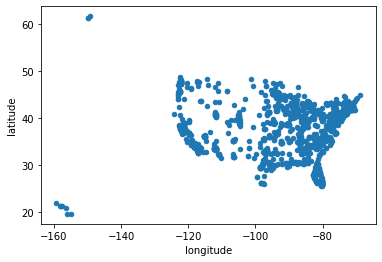

In [8]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [9]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [11]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [12]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [13]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [14]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

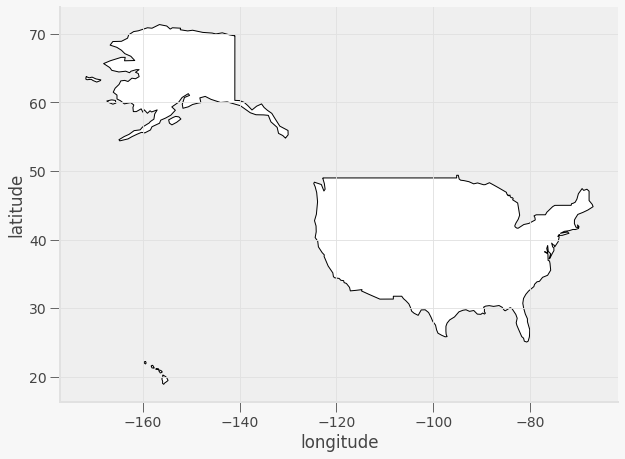

In [15]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

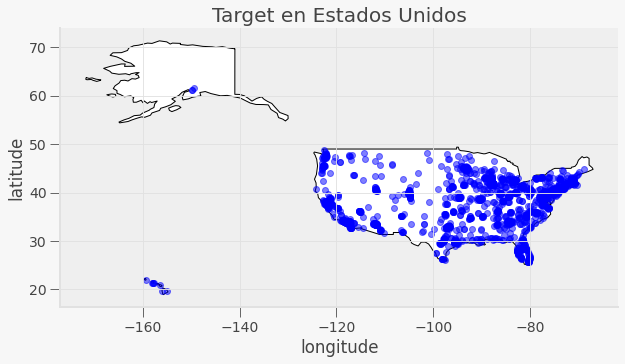

In [40]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [17]:
#tu codigo aquí

In [18]:
latlong

,latitude,longitude
0,33.224225,-86.804174
1,33.334550,-86.989778
2,30.602875,-87.895932
3,34.560148,-86.971559
4,31.266061,-85.446422
...,...,...
1834,43.034293,-88.176840
1835,42.989604,-88.259806
1836,42.846799,-106.264166
1837,41.162019,-104.800048


In [19]:
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [20]:
x1 = df.longitude
x2 = df.latitude
X = list(zip(df.longitude, df.latitude))

In [21]:
print(X)

[(-86.80417369999999, 33.2242254), (-86.98977789999999, 33.3345501), (-87.89593169999999, 30.6028747), (-86.9715595, 34.5601477), (-85.4464222, 31.2660613), (-87.6339077, 34.8420853), (-86.80555729999999, 33.6060399), (-87.6799946, 30.3039796), (-86.77509979999999, 33.467142), (-86.7562505, 34.7488201), (-86.1600739, 32.3606937), (-85.4050434, 32.6204324), (-85.7846536, 33.6092005), (-86.3957891, 32.4570652), (-87.51825509999999, 33.1923759), (-86.7125552, 33.425259), (-86.6376483, 33.6054494), (-86.8532462, 33.3616601), (-86.68163709999999, 34.7446779), (-86.5443483, 34.674648), (-88.1204442, 30.6709831), (-88.2260919, 30.6734013), (-149.4029599, 61.5779193), (-149.745967, 61.2299524), (-149.8814512, 61.13006249999999), (-114.5918998, 35.0528237), (-111.6591788, 35.1840575), (-111.7184273, 33.5733931), (-110.9601638, 32.3990239), (-112.4315678, 34.549193), (-111.6407335, 33.2552871), (-110.2558558, 31.5561559), (-112.3537192, 33.6368072), (-112.269511, 33.4236583), (-114.6061139, 32.7

In [22]:
print(x1)

0       -86.804174
1       -86.989778
2       -87.895932
3       -86.971559
4       -85.446422
           ...    
1834    -88.176840
1835    -88.259806
1836   -106.264166
1837   -104.800048
1838   -110.789456
Name: longitude, Length: 1839, dtype: float64


In [23]:
print(x2)

0       33.224225
1       33.334550
2       30.602875
3       34.560148
4       31.266061
          ...    
1834    43.034293
1835    42.989604
1836    42.846799
1837    41.162019
1838    43.469617
Name: latitude, Length: 1839, dtype: float64


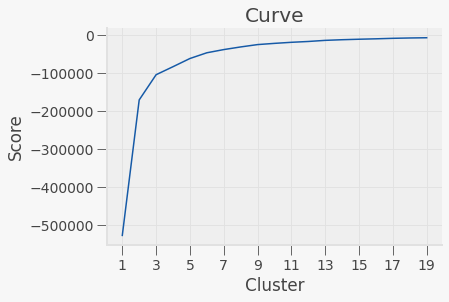

In [24]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Cluster')
plt.xticks(np.arange(min(Nc), max(Nc)+1, 2.0))
plt.ylabel('Score')
plt.title('Curve')
plt.show()

In [25]:
distorsion = []
inercias = []
mapeo0 = {}
mapeo1 = {}
K = range(1, 100)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distorsion.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / len(X))
    inercias.append(kmeanModel.inertia_)
  
    mapeo0[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / len(X)
    mapeo1[k] = kmeanModel.inertia_

In [26]:
for key, val in mapeo0.items():
    print(f'{key} : {val}')

1 : 14.519912456093243
2 : 8.467513782646103
3 : 6.451131857488506
4 : 5.52203959584117
5 : 4.443165265625813
6 : 4.300445274054383
7 : 3.8727134574508364
8 : 3.526293773315209
9 : 3.1481817429265155
10 : 2.8973722640181654
11 : 2.6729863291801297
12 : 2.5964489557128627
13 : 2.448773332313386
14 : 2.2314539481743214
15 : 2.0796478578966746
16 : 1.9696077515991883
17 : 1.8471358913575466
18 : 1.779346922470365
19 : 1.6825414271491859
20 : 1.608983461089767
21 : 1.569042335398205
22 : 1.4526917597213709
23 : 1.3999459952470488
24 : 1.37388093725069
25 : 1.322510131526207
26 : 1.2930804139964789
27 : 1.253628719753715
28 : 1.2456269089943395
29 : 1.171557764766183
30 : 1.1635549220094412
31 : 1.1174907919913926
32 : 1.1008335184611264
33 : 1.0761943251757033
34 : 1.0632832584430083
35 : 1.0112700648821702
36 : 1.0062575361712915
37 : 0.980434482064807
38 : 0.9616289215075797
39 : 0.9555601329219534
40 : 0.9411632255117606
41 : 0.9097562962805278
42 : 0.9030555560914112
43 : 0.86179746544

In [27]:
  print(distorsion)
  print(inercias)
  print(mapeo1)
  print(mapeo0)
  print(K)



#distorsion = []
#inercias = []
#mapeo0 = {}
#mapeo1 = {}
#K = range(1, 100)

[14.519912456093243, 8.467513782646103, 6.451131857488506, 5.52203959584117, 4.443165265625813, 4.300445274054383, 3.8727134574508364, 3.526293773315209, 3.1481817429265155, 2.8973722640181654, 2.6729863291801297, 2.5964489557128627, 2.448773332313386, 2.2314539481743214, 2.0796478578966746, 1.9696077515991883, 1.8471358913575466, 1.779346922470365, 1.6825414271491859, 1.608983461089767, 1.569042335398205, 1.4526917597213709, 1.3999459952470488, 1.37388093725069, 1.322510131526207, 1.2930804139964789, 1.253628719753715, 1.2456269089943395, 1.171557764766183, 1.1635549220094412, 1.1174907919913926, 1.1008335184611264, 1.0761943251757033, 1.0632832584430083, 1.0112700648821702, 1.0062575361712915, 0.980434482064807, 0.9616289215075797, 0.9555601329219534, 0.9411632255117606, 0.9097562962805278, 0.9030555560914112, 0.8617974654479628, 0.84240848875852, 0.8347812745192004, 0.8182706496815781, 0.8121892336828445, 0.8083535534114242, 0.782590723019477, 0.7821580530856734, 0.7629932799332351,

In [28]:
for key, val in mapeo1.items():
    print(f'{key} : {val}')

1 : 527995.4430694166
2 : 171146.62599564373
3 : 104758.59758525783
4 : 83653.68049747548
5 : 62084.09631367479
6 : 46975.76086128331
7 : 38655.27977345805
8 : 31613.33120234096
9 : 25655.28190826922
10 : 22442.712251042423
11 : 19424.815576321413
12 : 16709.68650947135
13 : 14565.442597021658
14 : 12608.131279928664
15 : 11377.750211967897
16 : 10026.108763062068
17 : 8934.65906429974
18 : 8296.83815841264
19 : 7450.768860973977
20 : 6930.025955307673
21 : 6426.267933600071
22 : 5970.168476248619
23 : 5412.28328206028
24 : 5188.472553306552
25 : 4805.393684559178
26 : 4618.813772723734
27 : 4387.846131071786
28 : 4234.3647387055335
29 : 3983.554917344566
30 : 3747.4755032171493
31 : 3571.926525031632
32 : 3436.9877458285664
33 : 3363.5666451516536
34 : 3279.244392027008
35 : 2948.934021042379
36 : 2925.2411934350957
37 : 2793.3759423586994
38 : 2721.9874081179605
39 : 2599.7808908897186
40 : 2495.222377898428
41 : 2385.5196542979565
42 : 2383.2070221118493
43 : 2291.1480228143555
44 :

In [29]:
kmeans = KMeans(n_clusters=5).fit(latlong)
centroids = kmeans.cluster_centers_

In [30]:
C_df= pd.DataFrame({'longitude': centroids[:, 1],'latitude': centroids[:, 0]})
C_df["Coordenadas"] = list(zip(C_df.longitude, C_df.latitude))
C_df["Coordenadas"] = C_df["Coordenadas"].apply(Point)
C_gdf = gpd.GeoDataFrame(C_df, geometry="Coordenadas")
C_gdf.head()

,longitude,latitude,Coordenadas
0,-119.176343,37.579774,POINT (-119.17634 37.57977)
1,-88.370288,41.760441,POINT (-88.37029 41.76044)
2,-82.903212,31.106557,POINT (-82.90321 31.10656)
3,-98.242075,34.406768,POINT (-98.24208 34.40677)
4,-75.598224,40.345897,POINT (-75.59822 40.34590)


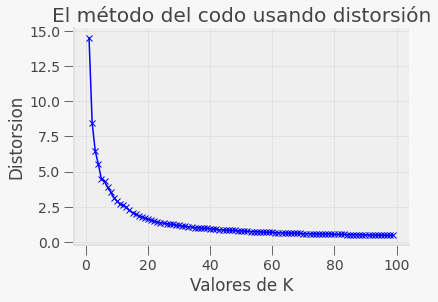

In [31]:
plt.plot(K, distorsion, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distorsion')
plt.title('El método del codo usando distorsión')
plt.show()

In [32]:
geolocalizar = Nominatim(user_agent="geoapiExercises")

In [33]:
def ciudad_stado_pais(row):
    coord = f"{row['latitude']}, {row['longitude']}"
    location = geolocalizar.reverse(coord, exactly_one=True)
    address = location.raw['address']
    ciudad = address.get('ciudad', '')
    estado = address.get('estado', '')
    codigo_postal = address.get('codigo-postal', '')
    pais = address.get('pais', '')
    row['pais'] = ciudad
    row['estado'] = estado
    row['pais'] = pais
    row['codigo-postal'] = codigo_postal
    return row

C_df = C_df.apply(ciudad_stado_pais, axis=1)
C_df.head()

,longitude,latitude,Coordenadas,pais,estado,codigo-postal
0,-119.176343,37.579774,POINT (-119.17634307255436 37.57977423831522),,,
1,-88.370288,41.760441,POINT (-88.37028756611375 41.7604405464455),,,
2,-82.903212,31.106557,POINT (-82.90321171948528 31.106556597058823),,,
3,-98.242075,34.406768,POINT (-98.24207527946128 34.40676796464647),,,
4,-75.598224,40.345897,POINT (-75.59822435625 40.34589747333333),,,


In [34]:
distorsion = []
inercias = []
mapeo0 = {}
mapeo1 = {}
K = range(1, 20)
  
for k in K:

    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distorsion.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / len(X))
    inercias.append(kmeanModel.inertia_)
  
    mapeo0[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / len(X)
    mapeo1[k] = kmeanModel.inertia_

In [35]:
for key, val in mapeo0.items():
    print(f'{key} : {val}')

1 : 14.519912456093243
2 : 8.467513782646103
3 : 6.452145119522137
4 : 5.444498462126294
5 : 4.4442324669045625
6 : 4.300445274054383
7 : 3.9474121955828885
8 : 3.5260397023546717
9 : 3.148924694056144
10 : 2.925040779247541
11 : 2.631193187887493
12 : 2.598862803547063
13 : 2.4151198626043646
14 : 2.2744416893678285
15 : 2.0931755263754104
16 : 2.005151414928589
17 : 1.8781600679557358
18 : 1.746778076700207
19 : 1.6920454680348829


In [36]:
for key, val in mapeo1.items():
    print(f'{key} : {val}')

1 : 527995.4430694166
2 : 171146.62599564373
3 : 104757.37491424181
4 : 82988.47665623634
5 : 62083.91178694903
6 : 46975.76086128331
7 : 39006.11016785564
8 : 31578.31517190553
9 : 25656.62433348386
10 : 22224.662806238404
11 : 19714.679133088324
12 : 16710.68123001539
13 : 14253.569534452956
14 : 12746.962879346558
15 : 11337.237646550202
16 : 10329.144454079851
17 : 9131.802357061446
18 : 8415.090038001745
19 : 7375.741883266599


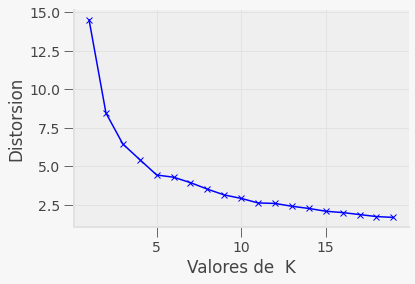

In [37]:
plt.plot(K, distorsion, 'bx-')
plt.xlabel('Valores de  K')
plt.ylabel('Distorsion')
plt.show()

In [38]:
  print(distorsion)
  print(inercias)
  print(mapeo1)
  print(mapeo0)
  print(K)


[14.519912456093243, 8.467513782646103, 6.452145119522137, 5.444498462126294, 4.4442324669045625, 4.300445274054383, 3.9474121955828885, 3.5260397023546717, 3.148924694056144, 2.925040779247541, 2.631193187887493, 2.598862803547063, 2.4151198626043646, 2.2744416893678285, 2.0931755263754104, 2.005151414928589, 1.8781600679557358, 1.746778076700207, 1.6920454680348829]
[527995.4430694166, 171146.62599564373, 104757.37491424181, 82988.47665623634, 62083.91178694903, 46975.76086128331, 39006.11016785564, 31578.31517190553, 25656.62433348386, 22224.662806238404, 19714.679133088324, 16710.68123001539, 14253.569534452956, 12746.962879346558, 11337.237646550202, 10329.144454079851, 9131.802357061446, 8415.090038001745, 7375.741883266599]
{1: 527995.4430694166, 2: 171146.62599564373, 3: 104757.37491424181, 4: 82988.47665623634, 5: 62083.91178694903, 6: 46975.76086128331, 7: 39006.11016785564, 8: 31578.31517190553, 9: 25656.62433348386, 10: 22224.662806238404, 11: 19714.679133088324, 12: 16710.

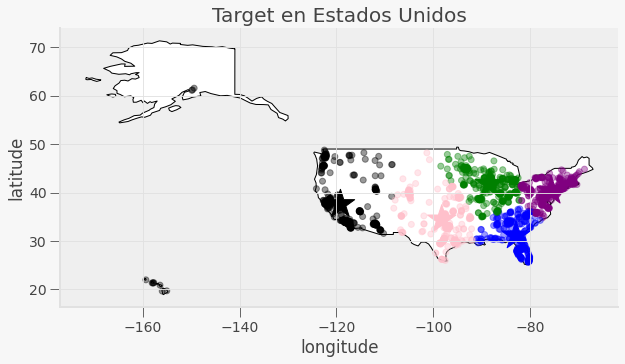

In [42]:
labels = kmeans.predict(latlong)
colores=['black','green','blue','pink','purple'] 
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color=asignar, alpha = 0.4)
C_gdf.plot(ax=gax, color=colores, marker='*', markersize=900)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [43]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5)
label = kmeans.fit_predict(latlong)
 
print(label)

[2 2 2 ... 3 3 0]


In [44]:
label

array([2, 2, 2, ..., 3, 3, 0], dtype=int32)

In [49]:
gdf

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)
...,...,...,...,...,...,...,...
1834,Waukesha,43.034293,-88.176840,"2401 Kossow Rd, Waukesha, WI 53186-2904",262-784-8646,https://www.target.com/sl/waukesha/82,POINT (-88.17684 43.03429)
1835,Waukesha South,42.989604,-88.259806,"1250 W Sunset Dr, Waukesha, WI 53189-8423",262-832-1272,https://www.target.com/sl/waukesha/2546,POINT (-88.25981 42.98960)
1836,Casper,42.846799,-106.264166,"401 SE Wyoming Blvd, Casper, WY 82609-4219",307-265-8214,https://www.target.com/sl/casper/164,POINT (-106.26417 42.84680)
1837,Cheyenne,41.162019,-104.800048,"1708 Dell Range Blvd, Cheyenne, WY 82009-4945",307-637-8888,https://www.target.com/sl/cheyenne/224,POINT (-104.80005 41.16202)


In [51]:
X=latlong.loc[:,['longitude','latitude']]

kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) 
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ 
labels = kmeans.predict(X[X.columns[1:2]]) 
X.head(10)

,longitude,latitude,cluster_label
0,-86.804174,33.224225,2
1,-86.989778,33.334550,2
2,-87.895932,30.602875,0
3,-86.971559,34.560148,2
4,-85.446422,31.266061,0
5,-87.633908,34.842085,2
6,-86.805557,33.606040,2
7,-87.679995,30.303980,0
8,-86.775100,33.467142,2
9,-86.756250,34.748820,2


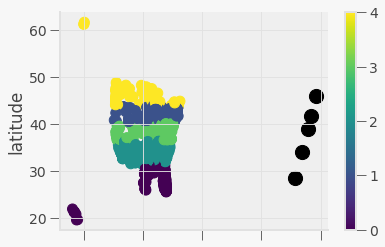

In [71]:
X.plot.scatter(x = 'longitude', y = 'latitude', c=labels, s=100, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 0], c='black', s=200, alpha=1)
gax.spines['top'].set_visible(False)


plt.show()

In [74]:
copy =  pd.DataFrame()
copy['latitude']=latlong['latitude'].values
copy['longitude']=latlong['longitude'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['estado']= C_df['estado']
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,estado,color,cantidad
0,,black,244
1,,green,522
2,,blue,467
3,,pink,434
4,,purple,172
